<div class="h1 alert alert" markdown="1" >

# Ames Housing Data & Kaggle Challenge 
</div>

## Intro, Data cleaning, & Exploratory Analysis

<img src='../images/houses9.png'>

### You are tasked with creating a machine learning model based on the Ames Housing Dataset. This model will predict the price of a property at sale.
### The Ames Housing Dataset is contains over 70 columns of different features relating to houses.

run me! ↓

In [1]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

### Dataset

The Ames Housing dataset was sourced and designed by a professor who wanted a better dataset to use for an undergraduate regression course, that would mimic real life data, and expose students to issues they may encounter while trying to build models in the workforce. 

### Data Dictionary

Information for this dataset can be found at http://jse.amstat.org/v19n3/decock/DataDocumentation.txt, or in the project files.

### Additional References

Original journal article about this dataset
* [Ames, Iowa: Alternative to the Boston Housing Data as an
End of Semester Regression Project](http://jse.amstat.org/v19n3/decock.pdf)

The documentation for this dataset suggests two articles from Journal of Statistics Education: 
* [Introduction to Multiple Regression: How Much Is
Your Car Worth?](https://www.tandfonline.com/doi/pdf/10.1080/10691898.2008.11889579)
* [Modeling Home Prices Using Realtor Data](http://jse.amstat.org/v16n2/datasets.pardoe.pdf)

Additional Resources:
* ['ameshousing'](https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf)

<div class="alert alert-block alert-info">
Individual homes within the data set can be referenced directly from the Ames City Assessor webpage via the Parcel ID (PID) found in the data set. Note these are nominal values (non-numeric) so preceding 0’s must be included in the data entry field on the website. Access to the database can be gained from the Ames site (http://www.cityofames.org/assessor/) by clicking on “property search” or by accessing the Beacon (http://beacon.schneidercorp.com/Default.aspx) website and inputting Iowa and Ames in the appropriate fields. A city map showing the location of all the neighborhoods is also available on the Ames site and can be accessed by clicking on “Maps”  and then “Residential Assessment Neighborhoods (City of Ames Only)”.
    </div>

<img src="../images/div2.png">

##  Data Import & Cleaning

<div class="alert alert-block alert-info">
SPECIAL NOTES:
There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.
    </div>

### Imports

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [23]:
train = pd.read_csv('../datasets/train.csv',  keep_default_na=False, na_values='')
test = pd.read_csv('../datasets/test.csv',  keep_default_na=False, na_values='')

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            878 non-null    object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [25]:
# Convert all columns to snake case
# Training set
train.columns = train.columns.str.lower()
train.columns = [i.replace(" ", "_") for i in list(train.columns)]
train.columns

# Test set
test.columns = test.columns.str.lower()
test.columns = [i.replace(" ", "_") for i in list(test.columns)]
test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [26]:
# Check null values
nulls = train.isnull().sum().sort_values(ascending=False)

### Removing Outliers and Limiting Scope

<div class="alert alert-block alert-info">
SPECIAL NOTES:
There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.
    </div>

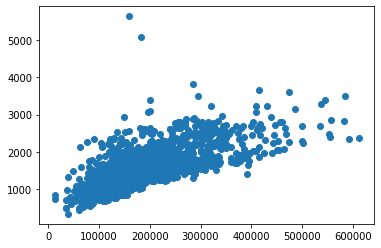

In [27]:
plt.scatter(train['saleprice'], train['gr_liv_area'])
plt.show()

In [28]:
# Remove houses > 3500 SQ feet

# Training set
train = train[train['gr_liv_area']<4000]  # Removed 2 obs


In [29]:
# Remove all agriculture, commercial and industrial sales

train[train['ms_zoning']=='A'] #  No Agriculture
test[test['ms_zoning']=='A'] #  No Agriculture
train[train['ms_zoning']=='C'] #  No Commercial
test[test['ms_zoning']=='C'] #  No Commercial
train[train['ms_zoning']=='I'] #  No Industrial
test[test['ms_zoning']=='I'] #  No Industrial

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type


## Data Preprocessing

### Ordinal Scales

In [30]:
# Lots of columns are on the same ordinal scale Excellent-Good-Typical-Fair-Poor
# Changing scale and replacing nulls with 0 for above columns
# A crappy basement is better than no basement, unless it somehow affects structural integrity of the house

list1 = ['bsmt_qual', 'bsmt_cond', 'exter_qual', 'exter_cond', 'garage_qual', 'garage_cond', 'heating_qc', 'pool_qc', 'fireplace_qu', 'kitchen_qual']

for i in list1:
    # Training set
    train[i]=train[i].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'na':0, 'Na':0})
    train[i]=pd.to_numeric(train[i])
    train[i]=train[i].fillna(0)
    
    # Test set
    test[i]=test[i].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, 'na':0, 'Na':0})
    test[i]=pd.to_numeric(test[i])
    test[i]=test[i].fillna(0)

In [31]:
# Changing columns on other ordinal scales to 0-n; replacing nulls with 0

def make_num(columnlist, dictionary):
    for i in columnlist:
        # Training set
        train[i]=train[i].map(dictionary)
        train[i]=pd.to_numeric(train[i])
        train[i]=train[i].fillna(0)
        
        # Test set
        test[i]=test[i].map(dictionary)
        test[i]=pd.to_numeric(train[i])
        test[i]=test[i].fillna(0)

In [32]:
# Checking nulls for other ordinal columns before I use make_num, where null meaning isn't defined in documentation.
train['land_slope'].isna().sum()
train['utilities'].isna().sum()
train['lot_shape'].isna().sum()

0

In [33]:
#  Convert all other ordinal scales to numeric

make_num(['utilities'], {'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})

make_num(['lot_shape'], {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0})

make_num(['land_slope'], {'Sev':0, 'Mod':1, 'Gtl':2})

make_num(['bsmt_exposure'], {'NA':0, 'na':0, 'Na':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}) #NA = No basement

make_num(['bsmtfin_type_1', 'bsmtfin_type_2'], {'NA':0, 'na':0, 'Na':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}) ### These are weird. There's 2 categories

make_num(['electrical'], {'Mix':0, 'FuseP':1, 'FuseF':2, 'FuseA':3}) ### Is mix really worse than everything else? ##OHE

make_num(['functional'], {'Sal':0, 'Sev':1, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})

make_num(['garage_finish'], {'NA':0, 'na':0, 'Na':0, 'Unf':1, 'RFn':2}) #NA = No garage

make_num(['paved_drive'], {'N':0, 'P':1, 'Y':2})

make_num(['fence'], {'NA':0, 'na':0, 'Na':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4})


In [34]:
train.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,2,Lvl,3,CulDSac,2,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,1.0,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,Y,0.0,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,8,0,0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,2,0,44,0,0,0,0,0,0,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,2,Lvl,3,CulDSac,2,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,1.0,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,Y,0.0,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,8,1,3,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,2,0,74,0,0,0,0,0,0,NA,0,4,2009,WD,220000


In [35]:
train.groupby('electrical')['electrical'].count()
#I don't think electrical 'Mixed' deserves to be value 0, considering it's so popular.
#I couldn't find any info online about mix electrical systems being bad, just that tube wiring is dangerous.

electrical
0.0    1867
1.0       7
2.0      35
3.0     140
Name: electrical, dtype: int64

In [36]:
# Check NA
pd.set_option('display.max_rows', None)
train.isna().sum()

id                   0
pid                  0
ms_subclass          0
ms_zoning            0
lot_frontage       330
lot_area             0
street               0
alley                0
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type        22
mas_vnr_area        22
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual            0
bsmt_cond            0
bsmt_exposure        0
bsmtfin_type_1       0
bsmtfin_sf_1         1
bsmtfin_type_2       0
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
heating              0
heating_qc           0
central_air          0
electrical 

In [37]:
train = train[~train['garage_area'].isna()]
train = train[~train['garage_area'].isna()]

In [38]:
train['garage_area'].isna().sum()
test['garage_area'].isna().sum()

0

In [ ]:
### Add cols

In [48]:
train['total_sf']=train['total_bsmt_sf']+train['1st_flr_sf']+train['2nd_flr_sf']+train['wood_deck_sf']+train['open_porch_sf']
test['total_sf']=test['total_bsmt_sf']+test['1st_flr_sf']+test['2nd_flr_sf']+test['wood_deck_sf']+test['open_porch_sf']
#train['total_sf'].dropna(inplace=True) #Not working

train['total_sf']=train['total_sf'].fillna('hi')
train = train[train['total_sf']!='hi']
train['total_sf'].isna().sum()

0

##  Exploratory Viz

### Density Plots

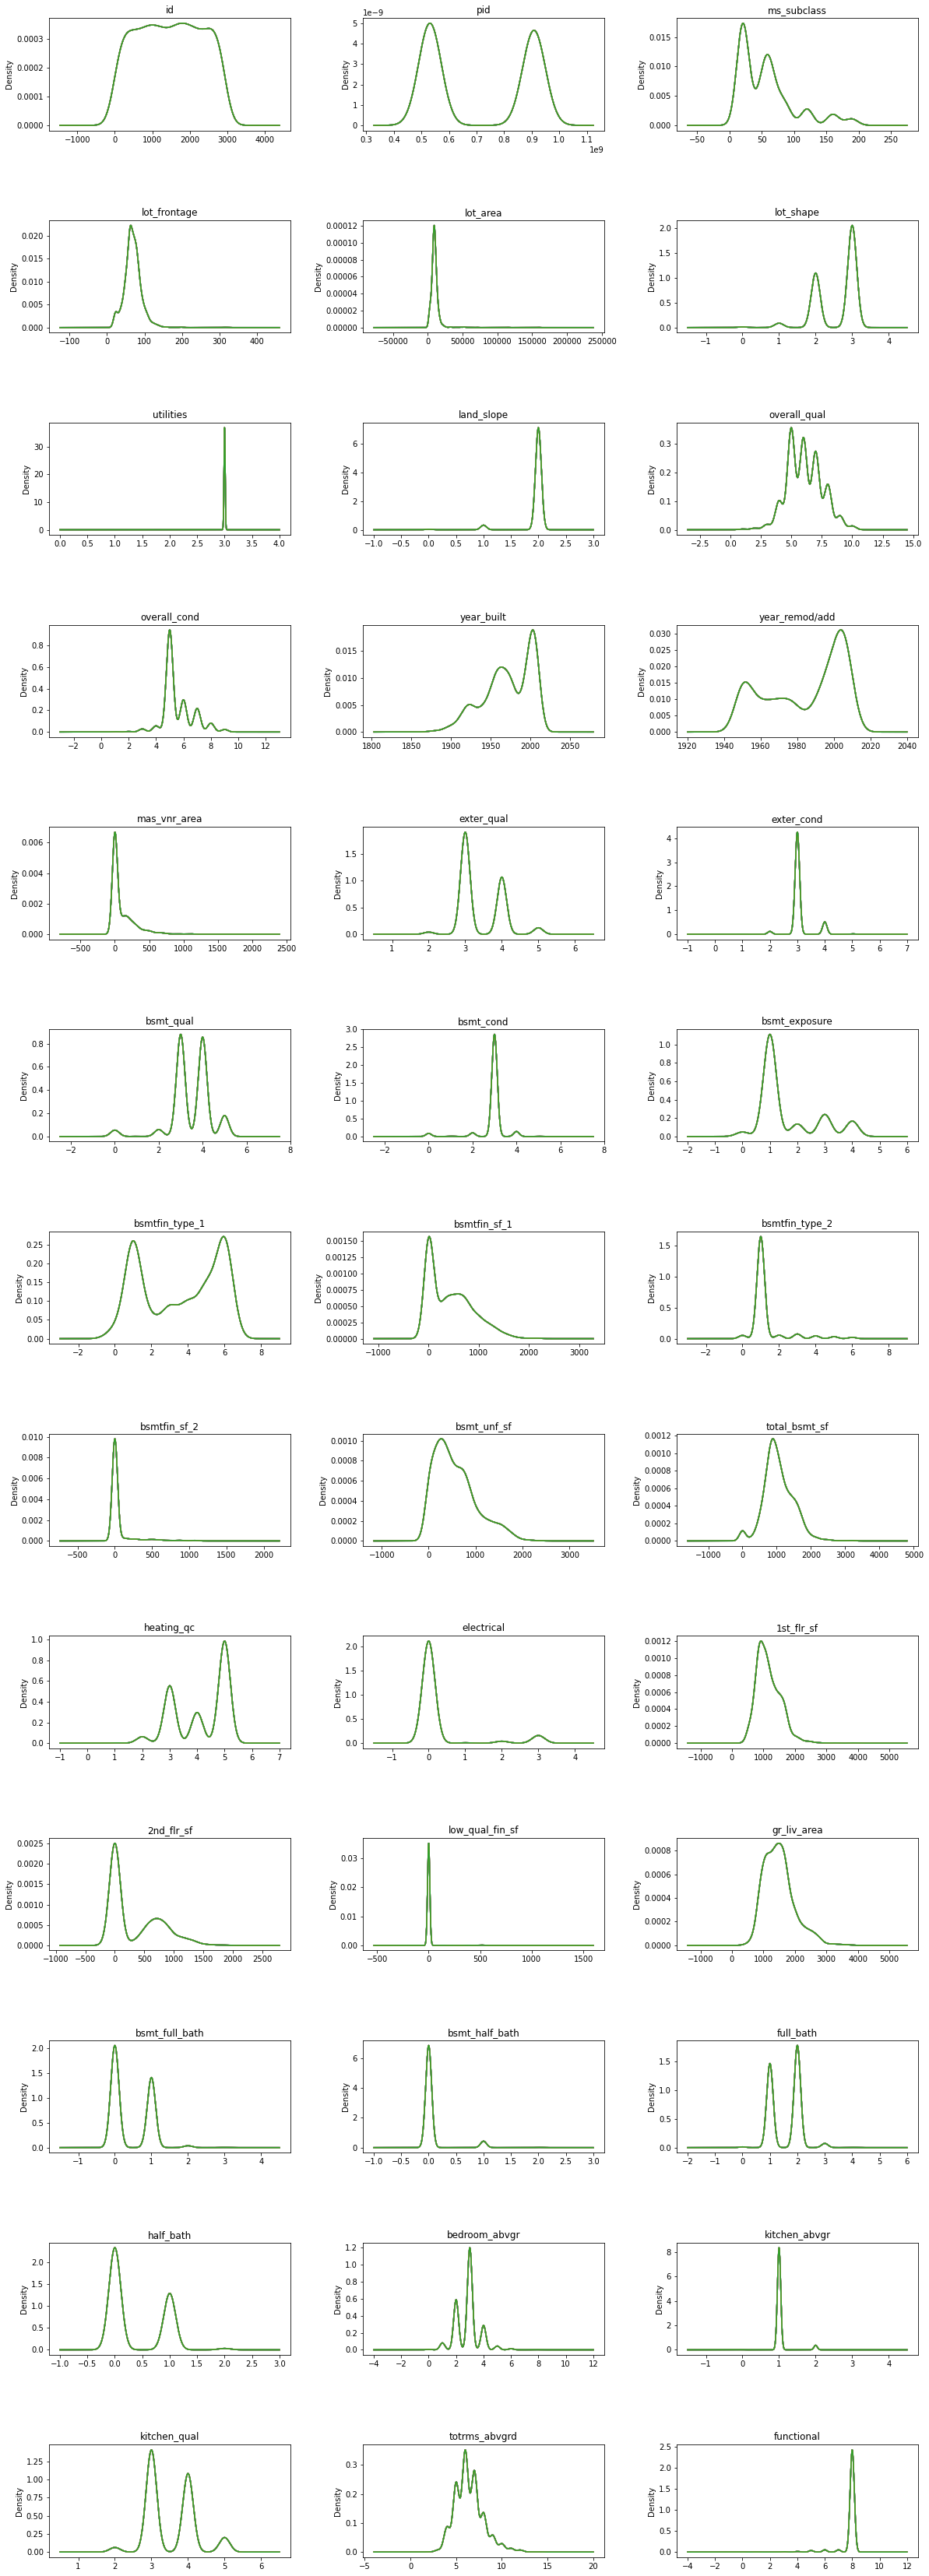

In [40]:
# Density plots for each numerical column
n_features1 = 10
n_rows = 13
num_df = train.select_dtypes(include=['float64','int64'])

fig, axs = plt.subplots(n_rows,3, figsize = (20,60))

fig.subplots_adjust(hspace=.8, wspace=.3)

for k in axs:
    for i,j in zip(num_df, axs.flat):
        g = num_df[i].plot.kde(ax = j, title = i)
        g.get_xaxis().tick_bottom()
        g.get_yaxis().tick_left()

### Correlations

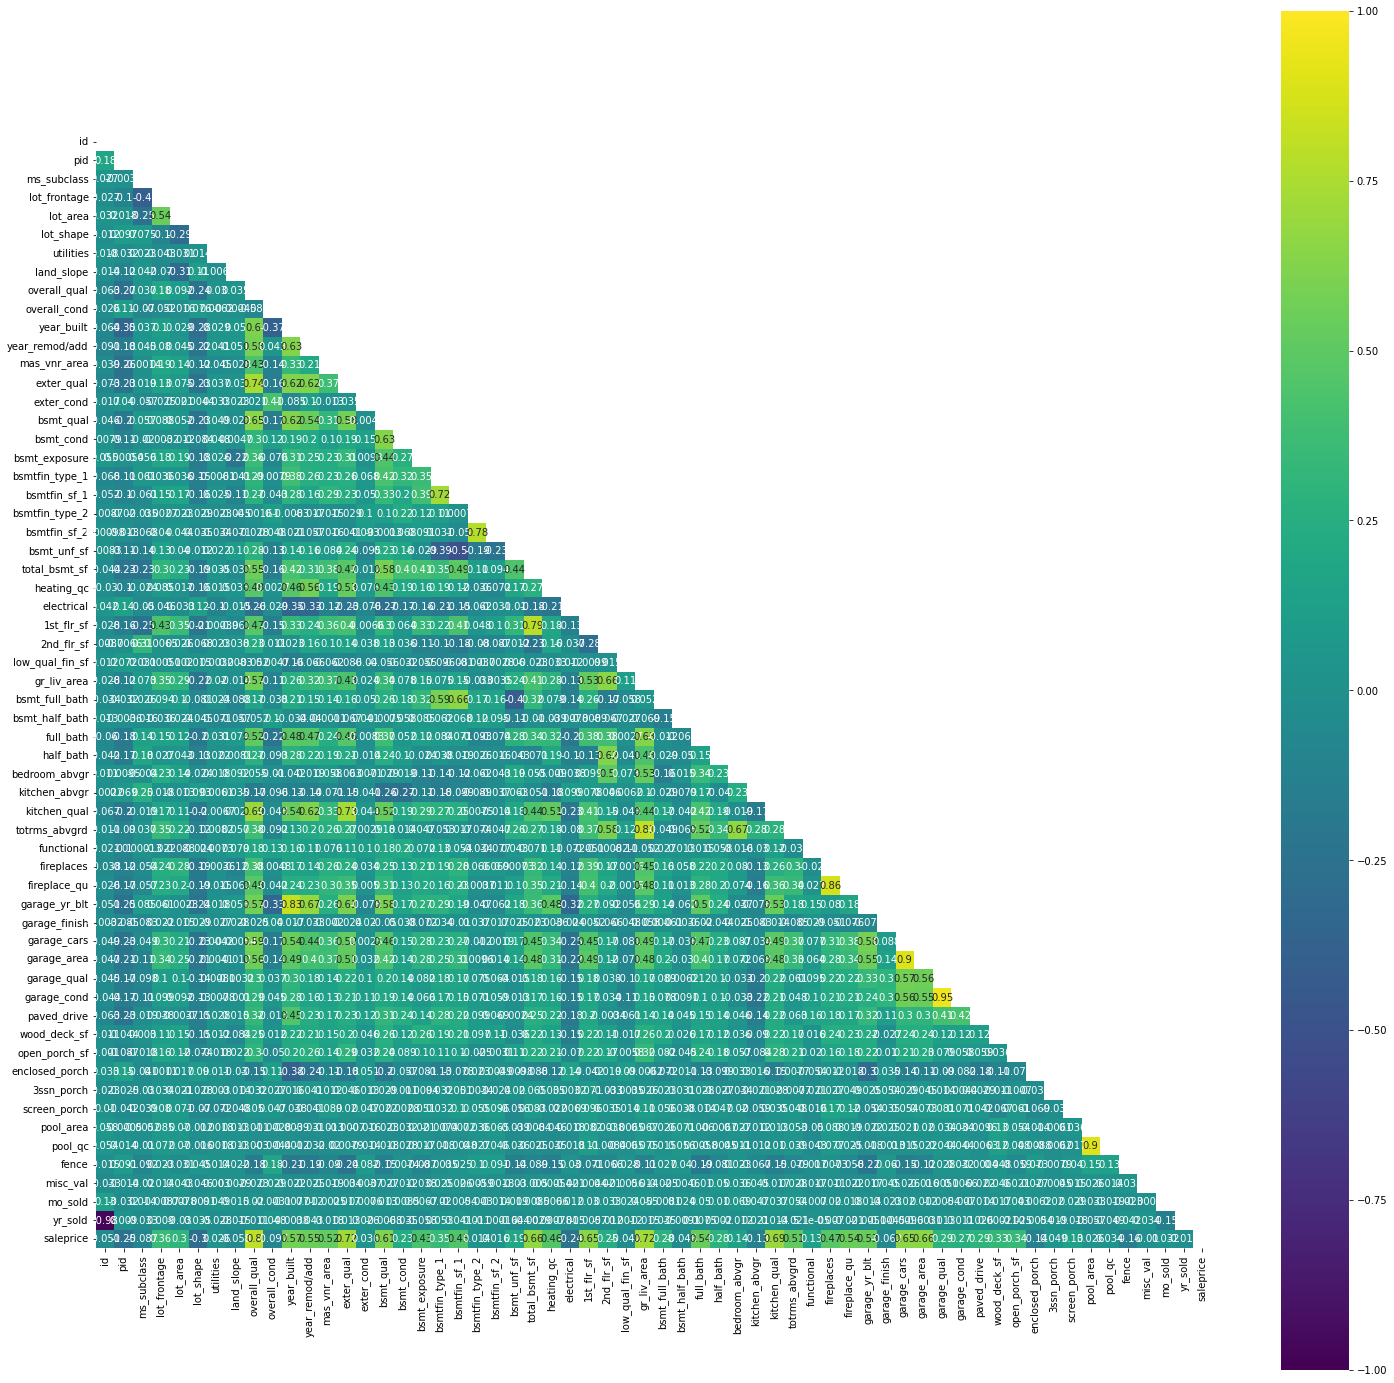

In [41]:
# fig, ax = plt.subplots(figsize=(25, 25))
# # pass the axis to draw on
# sns.corrplot(train[num_df[1:-1]], ax=ax)

fig, ax = plt.subplots(figsize=(25, 25))
mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.

ax = sns.heatmap(train.corr(), annot=True,
cmap='viridis', square=True, 
vmin=-1, vmax=1, mask=mask);

## TOO MANY TOO TINY

#
help
https://medium.com/@kevin.a.crystal/intermediate-data-cleaning-195e1af3ccf9
https://github.com/moyphilip/Ames-Housing
http://jse.amstat.org/v16n2/datasets.pardoe.pdf
https://www.perkinsml.me/ames-housing
https://cran.r-project.org/web/packages/AmesHousing/AmesHousing.pdf
https://www.tmwr.org/ames.html


In [49]:
#move export to datasets folder
train.to_csv('train2.csv')
test.to_csv('test2.csv')

In [43]:
test.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,2,Lvl,3,Inside,2,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,1.0,6.0,0,1.0,0,1020,1020,GasA,4,N,0.0,908,1020,0,1928,0,0,2,0,4,2,2,9,8,0,0,Detchd,1910.0,2.0,1,440,1,1,2,0,60,112,0,0,0,0,0,NA,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NA,2,Lvl,3,Inside,2,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,1.0,6.0,0,1.0,0,1967,1967,GasA,3,Y,0.0,1967,0,0,1967,0,0,2,0,6,2,3,10,8,0,0,Attchd,1977.0,2.0,2,580,3,3,2,170,0,0,0,0,0,0,0,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,3,Lvl,3,Inside,2,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,1.0,6.0,554,1.0,0,100,654,GasA,5,Y,0.0,664,832,0,1496,1,0,2,1,3,1,4,7,8,1,4,Attchd,2006.0,1.0,2,426,3,3,2,100,24,0,0,0,0,0,0,NA,0,9,2006,New


<img src="../images/div2.png">